In [1]:
import pandas as pd
from sklearn.datasets import load_boston

# Python imports
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from econml.dml import LinearDMLCateEstimator
from sklearn.linear_model import LassoCV
from econml.inference import BootstrapInference

# EconML imports
from econml.dml import DMLCateEstimator
from econml.two_stage_least_squares import NonparametricTwoStageLeastSquares
from econml.deepiv import DeepIVEstimator

import matplotlib.pyplot as plt 

from xgboost import XGBRegressor
import econml
from econml.dml import DMLCateEstimator, LinearDMLCateEstimator,SparseLinearDMLCateEstimator  
from econml.dml import ForestDMLCateEstimator

Using TensorFlow backend.
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

In [3]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
features = boston.feature_names

## Linear regression model

In [5]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X_train = bos[features]
y_train = bos.PRICE
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
y_pred = lm.predict(X_train)

In [7]:
lm.coef_, lm.intercept_

(array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
        -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
         3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]),
 36.45948838508978)

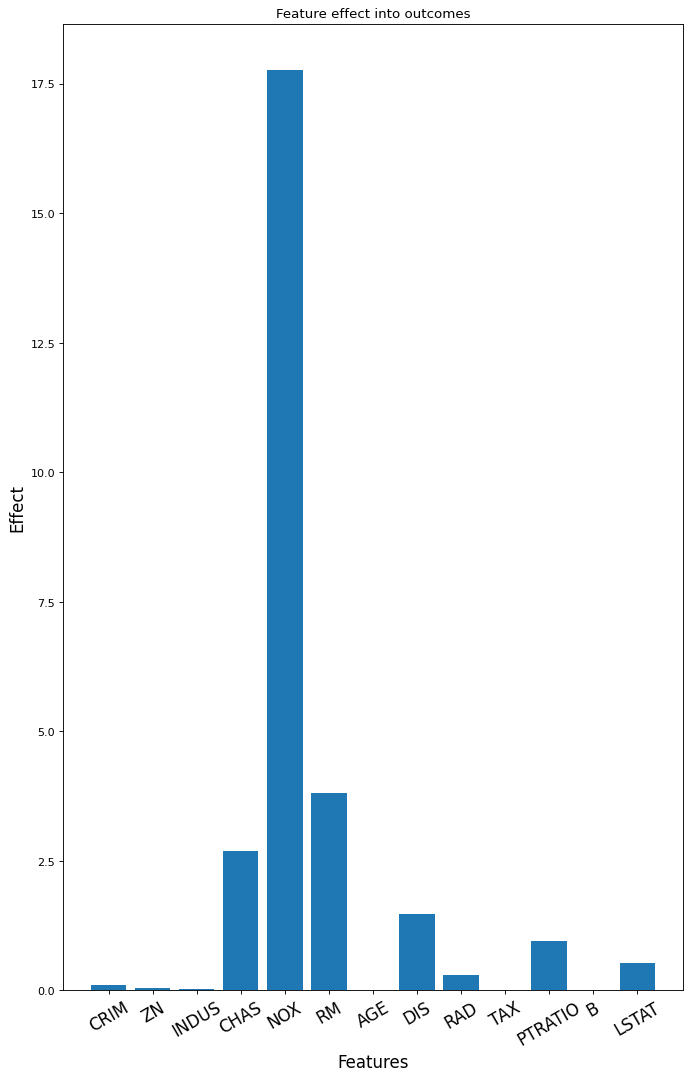

In [8]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 16), dpi=80, facecolor='w', edgecolor='k')

labels = [x for x in features]
values = [abs(x) for x in lm.coef_]
index = np.arange(len(labels))
plt.bar(index, values)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Effect', fontsize=15)
plt.xticks(index, labels, fontsize=15, rotation=30)
plt.title('Feature effect into outcomes')
plt.show()

In [9]:
bos['PREDICTED_PRICE'] = y_pred

## Simple Linear Effect

In [10]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTED_PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,30.003843
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.025562
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,30.567597
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,28.607036
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,27.943524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,23.533341
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,22.375719
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,27.627426
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,26.127967


In [11]:
# first, buld some ML, 
# second, treatment to estimate features effect, into predicted value from the linear

features = boston.feature_names
avg_effect = []
for i in features:
    print("Considered feature {}".format(i))
    outcome = 'PREDICTED_PRICE'
    remaining_features = list(filter(lambda x: x != i, features))
    Y,T,X = bos[outcome].values, bos[i].values, bos[remaining_features].values
    dml_est = LinearDMLCateEstimator(model_y=LassoCV(), model_t=LassoCV())
    dml_est.fit(Y, T, X)
    dml_ate = dml_est.effect(X).mean()
    avg_effect.append([i,dml_ate])
    
print("Average treatment effect ", avg_effect)

Considered feature CRIM


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6220992480893983, tolerance: 1.2800525344183122
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.056779925260344, tolerance: 1.2800525344183122
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.707973964984376, tolerance: 1.2800525344183122
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.

Considered feature ZN


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4957434725884013, tolerance: 1.2593871012620497
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3807870652155998, tolerance: 1.2593871012620497
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4786636460894442, tolerance: 1.4326615348518272
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descen

Considered feature INDUS
Considered feature CHAS


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8053665833722334, tolerance: 1.558302564260969
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3544309481508208, tolerance: 1.2964113070709338
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.212948097521121, tolerance: 1.2964113070709338
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: Convergenc

Considered feature NOX


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5339985093237374, tolerance: 1.3271711982299734
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.03801494655545, tolerance: 1.3271711982299734
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.588186458144264, tolerance: 1.3271711982299734
  tol, rng, random, positive)


Considered feature RM


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.295233846844212, tolerance: 1.0423627405005786
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.082789076363952, tolerance: 1.4474823842378703
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.865837209169968, tolerance: 1.4474823842378703
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.p

Considered feature AGE


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.926820534028593, tolerance: 1.3931979597282917
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2455751436673381, tolerance: 1.234568259746967
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.058730662850394, tolerance: 1.234568259746967
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py

Considered feature DIS


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.419779867697798, tolerance: 1.254483949683755
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1481255806668287, tolerance: 1.254483949683755
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4549221576353375, tolerance: 1.254483949683755
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py

Considered feature RAD
Considered feature TAX
Considered feature PTRATIO
Considered feature B
Considered feature LSTAT
Average treatment effect  [['CRIM', 0.18599578176432208], ['ZN', 0.03318181666032392], ['INDUS', -0.21388015083684003], ['CHAS', 7.815345476962664], ['NOX', 0.7149948567125207], ['RM', 4.42127979731878], ['AGE', 0.016607117774674714], ['DIS', -1.056783633932465], ['RAD', 0.3958757496497685], ['TAX', -0.006521311818249737], ['PTRATIO', -1.299662556653819], ['B', 0.006690922140086278], ['LSTAT', -0.6954153033201566]]


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1236864796965165, tolerance: 1.1354586277401442
  tol, rng, random, positive)


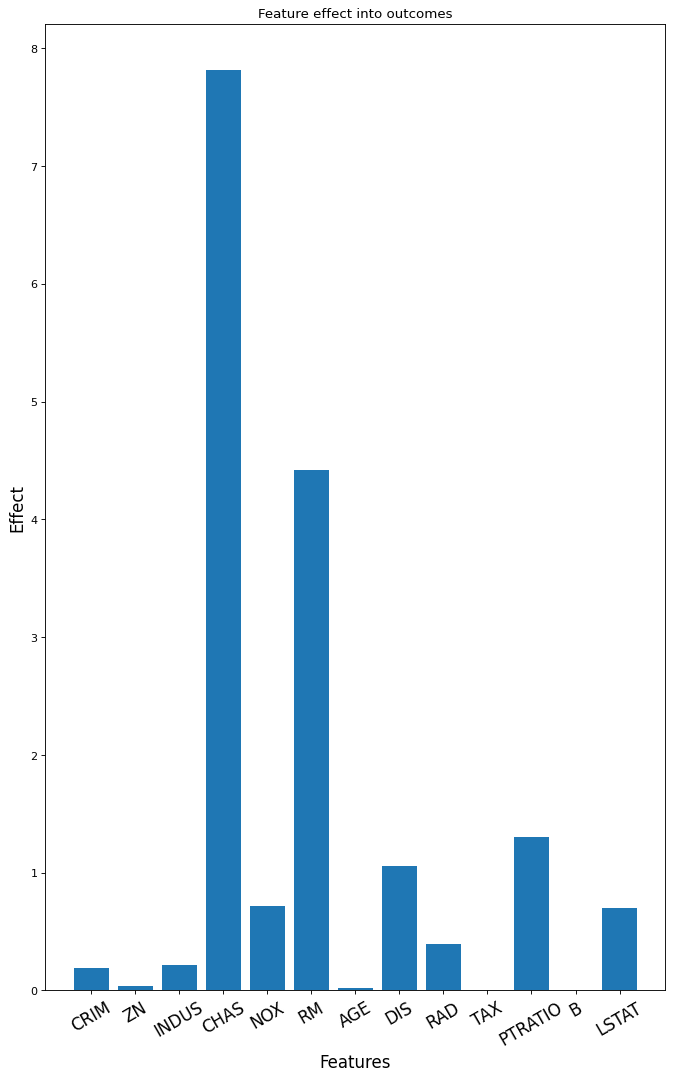

In [12]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 16), dpi=80, facecolor='w', edgecolor='k')

labels = [x[0] for x in avg_effect]
values = [abs(x[1]) for x in avg_effect]
index = np.arange(len(labels))
plt.bar(index, values)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Effect', fontsize=15)
plt.xticks(index, labels, fontsize=15, rotation=30)
plt.title('Feature effect into outcomes')
plt.show()

## Consider category and continous

In [13]:
from econml.metalearners import XLearner
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from econml.dml import SparseLinearDMLCateEstimator
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

# est2 = SparseLinearDMLCateEstimator(model_y=RandomForestRegressor(),
#                                     model_t=RandomForestClassifier(min_samples_leaf=10),
#                                     discrete_treatment=True,
#                                     featurizer=PolynomialFeatures(degree=2),
#                                     linear_first_stages=False,
#                                     n_splits=6)
# est2.fit(Y, T, X, W, inference='debiasedlasso')
# te_pred2 = est2.effect(X_test)
# lb2, ub2 = est2.effect_interval(X_test, alpha=0.01)


# est1 = SparseLinearDMLCateEstimator(model_y=RandomForestRegressor(),
#                               model_t=RandomForestRegressor(),
#                               featurizer=PolynomialFeatures(degree=3),
#                               random_state=123)
# est1.fit(Y_train, T_train, X_train, W_train)
# te_pred1=est1.effect(X_test)



features = boston.feature_names
avg_effect = []
for i in features:
    print("Considered feature {}".format(i))
    outcome = 'PREDICTED_PRICE'
    remaining_features = list(filter(lambda x: x != i, features))
    Y,T,X = bos[outcome].values, bos[i].values, bos[remaining_features].values
    if i == 'CHAS':
        dml_est = SparseLinearDMLCateEstimator(model_y=RandomForestRegressor(),
                                        model_t=RandomForestClassifier(min_samples_leaf=10),
                                        discrete_treatment=True,
                                        featurizer=PolynomialFeatures(degree=3),
                                        linear_first_stages=False,
                                        n_splits=6)
    else:
        dml_est = SparseLinearDMLCateEstimator(model_y=RandomForestRegressor(),
                              model_t=RandomForestRegressor(),
                              featurizer=PolynomialFeatures(degree=3),
                              random_state=123)
    dml_est.fit(Y, T, X)
    treatment_effects = dml_est.effect(X)
    dml_ate = dml_est.effect(X).mean()
    avg_effect.append([i,dml_ate])
    
print("Average treatment effect ", avg_effect)




Considered feature CRIM


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.33112938887279597, tolerance: 0.23032683202977805
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6900877095424676, tolerance: 0.23032683202977805
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7776710422051565, tolerance: 0.23032683202977805
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not co

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4347.915127539869, tolerance: 9.082293457682754
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 502054.09951678116, tolerance: 327.43240119295245
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2361.2545691484174, tolerance: 3.344140652727664
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3992296.344674303, tolerance: 471888.2499029091
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11614.817551037544, tolerance: 436.1377522236815
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1499952.2784623727, tolerance: 120639.79625790587
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781185030.1634609, tolerance: 422759692.4073914
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227362992454.3338, tolerance: 116447219995.15819
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 874831673.6343179, tolerance: 443710654.42542756
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 968962.8515709634, tolerance: 400.04622217421394
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 769.6168159428107, tolerance: 1.6629513485349294
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153603.2146089673, tolerance: 75.2333021172205
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27942224010.75142, tolerance: 2607690485.585889
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 581442566.6707082, tolerance: 9249536.076093582
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6527446996.813697, tolerance: 3325441151.075541
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Yo

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 539264.4332868884, tolerance: 13911.601452829049
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39092441.201107666, tolerance: 3230331.3753107525
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49984.29672634426, tolerance: 861.8329811401786
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471199715.0815705, tolerance: 178682407.81104836
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121196334414.5608, tolerance: 49166218892.39964
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488713376.78792036, tolerance: 185917604.45749575
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1413725.210499213, tolerance: 15878.199593277464
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14765.828707599916, tolerance: 4.177795631413967
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111143.496615095, tolerance: 623.2922484153265
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1069624421.5826926, tolerance: 2097113.8933814713
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 810549.1777388325, tolerance: 41699.727430481566
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66063548.44085051, tolerance: 15612454.14917101
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11735651.366292113, tolerance: 1139010.2750276045
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42059.72781796589, tolerance: 1052.887782534557
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3933352.4743687483, tolerance: 259499.7330769005
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1211631249.0418231, tolerance: 337285109.04520327
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332082709319.10925, tolerance: 98149434611.1535
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1505994092.6196096, tolerance: 315085076.9294449
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260337361659.0966, tolerance: 85423821408.82469
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9568864.624153621, tolerance: 137291.1959951368
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135042159.04900852, tolerance: 28404944.331589907
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1816045152.6791368, tolerance: 322528391.29908097
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16323447.887638131, tolerance: 1419556.2093271862
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3261522754971.2065, tolerance: 1107986845746.526
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converg

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353178573572541.9, tolerance: 195515009305167.2
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295884961260.31744, tolerance: 172216685006.10953
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98671009437340.12, tolerance: 47417980132021.195
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

Considered feature ZN


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9951297886191242, tolerance: 0.2223988661892004
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.06095189212283, tolerance: 0.2223988661892004
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9004557724720144, tolerance: 0.2223988661892004
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.241625286680346, tolerance: 0.21994570459029492
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.589201660356821, tolerance: 0.21994570459029492
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3296811533211894, tolerance: 0.17653165479275498
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not conve

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1587.5510452885746, tolerance: 164.5083422888856
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15178.946411812027, tolerance: 6259.809207616001
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2403861.1479976065, tolerance: 328546.5429603975
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 386848.5148449955, tolerance: 52308.288250922036
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175796656.72941437, tolerance: 25309685.6546089
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149981.94029765896, tolerance: 7667.967563112097
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33901725.05205779, tolerance: 415921.3035182697
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115830.09814161426, tolerance: 571.6207822939674
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7438385.883019464, tolerance: 61641.882958484806
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160266893.78706765, tolerance: 12036227.24238674
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1023150.7044222992, tolerance: 3935.9023502320897
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11897022.984331528, tolerance: 808406.8231647335
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43758581.99514501, tolerance: 323151.72141805186
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30641002.4438405, tolerance: 177139.89006135525
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10567217713.212116, tolerance: 909019117.3692479
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6038876.355416011, tolerance: 57015.33114143479
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4617303907.527641, tolerance: 321742903.8069338
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43916576.334977835, tolerance: 1079357.5846251124
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1147761605.2194788, tolerance: 18367432.42670555
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35113470.132279195, tolerance: 89147.13820136576
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2690472836.578921, tolerance: 43948667.74094604
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1998103.7941572545, tolerance: 54088.66853634708
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1732157.2301050948, tolerance: 18866.168610596666
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1069766182.4677259, tolerance: 102581735.9894584
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4678266993.541423, tolerance: 646203618.760723
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48994586.658783294, tolerance: 2398068.408182053
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10358333359.285343, tolerance: 1171381741.2697694
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 692198154116.9165, tolerance: 77135193211.5347
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13410937461.769806, tolerance: 838713558.792283
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7292184204.979116, tolerance: 290516646.66499317
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Yo

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9225652971.297031, tolerance: 1574911252.6652875
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33333144.325630315, tolerance: 580485.1515618551
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7477239.997247246, tolerance: 46373.655542450215
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7876185557238602.0, tolerance: 4112874642679952.5
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24366694074677.53, tolerance: 10985789891251.6
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8547869090293230.0, tolerance: 5251134872334000.0
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

Considered feature INDUS


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7764818709806605, tolerance: 0.20644307683131244
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0970800156587757, tolerance: 0.20644307683131244
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2495949407079934, tolerance: 0.20644307683131244
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not con

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.063715244676814, tolerance: 0.17837661912086603
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.94829595720512, tolerance: 0.17837661912086603
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.293465209566648, tolerance: 0.17837661912086603
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not conv

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25854921.367266387, tolerance: 547979.5034927846
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9299089081.670498, tolerance: 2491508403.279668
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39045950.33989679, tolerance: 3936197.4475912033
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313671880247.8291, tolerance: 10704772000.693901
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213232848.89939773, tolerance: 9876288.88507143
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62777408669.7269, tolerance: 3059227640.8755207
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 728944542.9541931, tolerance: 2396594.1459950595
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151418855843.76544, tolerance: 9132341395.772345
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1291526542.4203658, tolerance: 36128487.47335259
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14336.686817452312, tolerance: 8304.905670709948
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58963.47142612934, tolerance: 17480.43114633735
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7892945734.181395, tolerance: 27280030.715849984
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24541954166.37835, tolerance: 2006504246.808181
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131341650.96846233, tolerance: 2017079.670709913
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348997570.587421, tolerance: 11666331.985972261
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25027864813.997894, tolerance: 929709387.2961272
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131907726.76489303, tolerance: 617446.2476537074
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375699343.1061818, tolerance: 2124154.3354855278
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4833273.580036638, tolerance: 28687.067479382327
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306245.39580468833, tolerance: 272662.856794185
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2726806419.0775824, tolerance: 213067170.35409802
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4398660534.067347, tolerance: 551849046.0283104
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97944625.50364453, tolerance: 1150428.003425388
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 953642846976629.4, tolerance: 371289042157412.5
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Yo

Considered feature CHAS


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4571572642087176, tolerance: 0.21088990921338047
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8375688260218794, tolerance: 0.21088990921338047
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9372934596726736, tolerance: 0.21088990921338047
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not con

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.249148725886698, tolerance: 0.20712782976297486
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.388118468307084, tolerance: 0.20712782976297486
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.466359451329254, tolerance: 0.20712782976297486
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not conver

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2450882803686909, tolerance: 0.16397175416360546
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.549313590794327, tolerance: 0.16397175416360546
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.046890875151803, tolerance: 0.16397175416360546
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not conve

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 540.0935818369207, tolerance: 35.49707193996812
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2148.52903184338, tolerance: 10.482539623495969
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89770.3693312552, tolerance: 62837.12500236764
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12595150.659175819, tolerance: 3893471.4826405877
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64467.56773011632, tolerance: 5738.032386852142
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8887377.164408907, tolerance: 2536050.6614875854
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6309.6444104934035, tolerance: 126.34155272537909
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299100.905738297, tolerance: 35538.025635961356
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106603164.53581122, tolerance: 27369680.9552254
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271623.31003345293, tolerance: 13640.129866567502
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1071.0106081712004, tolerance: 4.763633095267955
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16294.458504555114, tolerance: 852.4622828668823
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12000037.126548203, tolerance: 2023508.823536875
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263703.9142095886, tolerance: 3195.405044774449
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3470106705.8145447, tolerance: 731263101.5712259
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174822.57189861225, tolerance: 33975.97643860756
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1276.2877123750015, tolerance: 5.024015408320914
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111873.00858266858, tolerance: 3998.807235383452
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18781648.948702335, tolerance: 1401899.2180757513
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182722.3084727956, tolerance: 75169.8855909494
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213549265.35141242, tolerance: 45339407.575982325
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41812433.40238035, tolerance: 6111984.631419046
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152802.4983236551, tolerance: 7364.8734431538805
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26574234.524453726, tolerance: 3122668.07946694
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96114220.1687319, tolerance: 13850746.618088135
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1816279.7925844681, tolerance: 41651.571489884365
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231.3589176989335, tolerance: 3.8968173421355794
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1653.947558232034, tolerance: 32.35508391868388
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354661465.9131046, tolerance: 79978158.19358386
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 628042.1549356794, tolerance: 83819.67299241506
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Yo

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19824.183091569732, tolerance: 159.2711352459858
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113367.23715230731, tolerance: 9986.444339476928
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56456089.50969156, tolerance: 7869062.67317795
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5816000.321153919, tolerance: 1425781.404558357
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1330415226.9767742, tolerance: 502280712.7027002
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4441391.912747962, tolerance: 498099.33913675137
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2475922213.6008205, tolerance: 703038564.7857068
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15017332.69658797, tolerance: 664676.8222618831
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364874.00226157723, tolerance: 1562.9708160332864
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37722726598.63399, tolerance: 18586807643.701477
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78599790.7739349, tolerance: 21532828.02450809
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1488431.2726528777, tolerance: 54424.04110600922
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

Considered feature NOX


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.48968112265538366, tolerance: 0.2300794154563353
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5280802217748715, tolerance: 0.2300794154563353
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8277518408485776, tolerance: 0.2300794154563353
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not conve

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5709778748102963, tolerance: 0.17266525144862124
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6388176147861486, tolerance: 0.1984141929886012
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6807102182208382, tolerance: 0.1984141929886012
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not conve

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124811465.05373447, tolerance: 3082167.0383830788
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 485056.23107267544, tolerance: 31977.904802447894
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1893777.6909685223, tolerance: 205384.71307442224
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not conver

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203282.08570187446, tolerance: 3425.4609467940063
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5679124.852826786, tolerance: 76734.42896650042
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41972152.665050626, tolerance: 2694230.336106097
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78342795.59374477, tolerance: 259573.2070470152
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309758.0173766054, tolerance: 34855.68567879499
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 723738.25414069, tolerance: 14411.828874727851
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2234.8103236253373, tolerance: 770.6026082666002
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1730789.270150913, tolerance: 106975.2180006665
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 876596200.3090744, tolerance: 83281851.82150173
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81783329.41936031, tolerance: 3179486.9234384103
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6332449.79323093, tolerance: 983228.9221613827
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2800620313.9337044, tolerance: 335023566.2885934
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

Considered feature RM


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.44337451012325, tolerance: 91.93407630068779
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113215.19706553267, tolerance: 3747.7860182824465
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49350.280677242394, tolerance: 1674.5258145338496
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converg

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66488562.86323194, tolerance: 10600471.252573244
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1256734.4982959605, tolerance: 21232.146695429823
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.66032269438983, tolerance: 16.06901272577504
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1312709.9688179214, tolerance: 1211.3931081923686
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.02294410714239, tolerance: 5.619416586795327
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17352231.24549594, tolerance: 15736.945149322088
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57953.68599552158, tolerance: 2545.9993927587
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73856565.94259357, tolerance: 1962875.3426404824
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26446.174100570322, tolerance: 1810.227291485337
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Yo

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 653.0847973734781, tolerance: 7.412414975228894
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38749236.83836758, tolerance: 113998.01250038606
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 592983.4950374585, tolerance: 2244.5292147301107
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 958655472.9014273, tolerance: 40603102.51635899
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6127607.534495514, tolerance: 11182.987508145878
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2458282.6005973862, tolerance: 2223.3444705381817
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8513796.294575304, tolerance: 39627.52975846823
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.26207668634015, tolerance: 19.257441089723844
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1119759.122726664, tolerance: 10900.45589107248
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 798949493.9822896, tolerance: 118875677.76560064
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9587199.232487222, tolerance: 283117.70763702726
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159991823703.77597, tolerance: 41461985730.33502
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71713.33928847902, tolerance: 745.3729518408308
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 727.349363462854, tolerance: 253.0305885201914
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12589255.371711556, tolerance: 324522.8192649824
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Yo

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295532516362.24695, tolerance: 84057203616.20235
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1567709759.421342, tolerance: 192874020.8701169
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5002350.190960037, tolerance: 10021.552091296195
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173191944.24174738, tolerance: 5902333.582086892
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 773531.996288133, tolerance: 6286.13782888468
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128769880.6042708, tolerance: 1859555.0905050046
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Yo

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192159611448862.16, tolerance: 153874074774413.28
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 754455967899.4666, tolerance: 381052214175.73474
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1668673166.769277, tolerance: 579061017.208522
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

Considered feature AGE


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24639941991063097, tolerance: 0.21790857207668457
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3023862593177, tolerance: 0.21790857207668457
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3546605295077825, tolerance: 0.21790857207668457
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not conve

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.659420953498966, tolerance: 0.21402827381636963
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.655320590293968, tolerance: 0.21402827381636963
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6475815068861266, tolerance: 0.21402827381636963
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not conve

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5729751006840615, tolerance: 0.18616814550063884
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.749149457643853, tolerance: 0.18616814550063884
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.621683531624967, tolerance: 0.18616814550063884
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not conve

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.882816053271426, tolerance: 0.16679736291123917
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.14478579081765, tolerance: 0.16679736291123917
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.120239175437973, tolerance: 0.16679736291123917
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not conv

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.920030686427936, tolerance: 0.1852257778973201
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102.50337375681602, tolerance: 0.1852257778973201
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149.686210225752, tolerance: 0.1852257778973201
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 918657.901016538, tolerance: 32297.78724580561
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 574714129.4393387, tolerance: 48665778.66680431
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6752761.356949289, tolerance: 126933.94508105042
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Yo

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1434108860.1552162, tolerance: 207897418.08824256
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4613386621088.33, tolerance: 23384109580.213867
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10818248288.089058, tolerance: 218092874.8497787
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7891631799.084069, tolerance: 49046719.01332051
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67148245.7661318, tolerance: 288682.219185903
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140509565.7717914, tolerance: 67631513.28129916
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2655046706.642816, tolerance: 23760466.451160267
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 268891184552.43335, tolerance: 11753032840.706356
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1939174540.0082774, tolerance: 6309142.40854682
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172368032474749.75, tolerance: 51733010021667.29
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 769114134854.3583, tolerance: 127246096937.89241
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113178995806049.69, tolerance: 67495724527245.805
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2130423.8796216063, tolerance: 89505.81097943065
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76633856.54552473, tolerance: 1380575.9768377144
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40319430.07801243, tolerance: 502952.5357545108
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2015944.8683852851, tolerance: 36292.588331831066
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7356.145310038701, tolerance: 1307.2367566467863
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 950654370.6821678, tolerance: 2894265.522353981
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7093.285685218638, tolerance: 3123.4064492073067
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195918620.89601913, tolerance: 5454978.72482548
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38533.58323336858, tolerance: 15580.989912077857
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116941777.45717117, tolerance: 2737552.473495865
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15929390916.599964, tolerance: 1250018860.0017364
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126270635.77434242, tolerance: 1251181.4168124683
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converg

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12455233159490.668, tolerance: 3284802558296.867
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84236338404.9927, tolerance: 3739161795.338358
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 528614982.44083804, tolerance: 23745069.71965976
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98261958673614.89, tolerance: 34501485700630.85
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1417325214450.7605, tolerance: 138886201781.57635
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6573293149.655235, tolerance: 413960346.7546622
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

Considered feature DIS


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1074348883619223, tolerance: 0.2241068647740498
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7019939487709053, tolerance: 0.2241068647740498
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.132198634870292, tolerance: 0.2241068647740498
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converg

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2836964179.183974, tolerance: 601219726.6152484
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9813629.847250719, tolerance: 1044600.0100947798
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1737550986.9841738, tolerance: 425151270.62522715
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3445227657.977378, tolerance: 390243974.100844
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137283519.55800873, tolerance: 956463.7262312495
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123949481.47631964, tolerance: 94143108.57533437
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384560.4741733335, tolerance: 1340.6542036047892
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215146655.57900918, tolerance: 84036.45210564276
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5268.45597956283, tolerance: 397.2934191246726
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19253241.29032491, tolerance: 867872.4948238035
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3665628424017.5503, tolerance: 1694069611884.9355
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6294431035.294406, tolerance: 389366683.3903465
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345531529.4490619, tolerance: 1809772.7135771227
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1979116.466201951, tolerance: 194590.99213935182
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 899908797.121757, tolerance: 151341275.5886792
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 751844.2217431143, tolerance: 11668.668362334818
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 636891.0189139303, tolerance: 30933.38825730263
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 302199.266937193, tolerance: 32402.015487073782
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274554838.0032839, tolerance: 19363511.456715506
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 497468.21391080157, tolerance: 22354.976811823217
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156712233.6684001, tolerance: 7959740.193817145
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18787929650.75768, tolerance: 2976361675.592353
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222589815.36313546, tolerance: 3517590.3116332316
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2859571557509.3066, tolerance: 1313638249212.5935
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2625223067.9686046, tolerance: 421476575.635244
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19812536.834035207, tolerance: 278260.6646481301
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 445992458276.7457, tolerance: 181803647347.54514
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

Considered feature RAD


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22620721950784173, tolerance: 0.2157246642541386
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24897386719544556, tolerance: 0.2157246642541386
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127.71032443437184, tolerance: 0.2157246642541386
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not conv

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.6707284734091, tolerance: 0.18488143866902437
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140.6539569505112, tolerance: 0.18488143866902437
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.75455659963222, tolerance: 0.18488143866902437
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not conver

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283021.56133464066, tolerance: 18151.055472266155
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287.16828064207584, tolerance: 25.455483851292005
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87156.5746481659, tolerance: 234.05377254286643
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14516.70422620224, tolerance: 169.72227357578333
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2253472.499809484, tolerance: 13992.772910877851
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4488.007806092377, tolerance: 91.49529917338837
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 503023.3090157067, tolerance: 2136.986445097515
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61617793.138386086, tolerance: 743198.6087221547
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 748142.5539157729, tolerance: 1361.270106314965
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1807036.0187351764, tolerance: 4666.456936878175
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1524712110.8902016, tolerance: 10245498.294772323
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2900144.7018026384, tolerance: 16838.492045219562
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converg

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265406434837.38666, tolerance: 64816353027.019905
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2257935271.592123, tolerance: 18924395.512511175
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32738978.188451212, tolerance: 15888.107188731135
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converg

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 608222003.3596467, tolerance: 4485770.896901346
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107031077619.2413, tolerance: 6407940329.549141
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765626950.0483612, tolerance: 23217389.53403845
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Yo

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214309.96582026948, tolerance: 101.86968353511307
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34198019.92656443, tolerance: 24885.345026614785
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 261254856.51223058, tolerance: 483853.8092569813
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24882133015.74423, tolerance: 7101473960.49122
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3147066368259.3125, tolerance: 2415452717306.7134
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12884457900.267357, tolerance: 4782381195.277492
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 367464308.64592886, tolerance: 581359.34431872
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 529344.258546473, tolerance: 411.28104282175093
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184113738.18137047, tolerance: 167586.88767274236
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36988162.8437937, tolerance: 2165702.4050447466
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 827720.3129304531, tolerance: 3596.4419535251186
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5897181434.085831, tolerance: 827435928.4645846
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446215667883.95807, tolerance: 93928643562.8793
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 601368508.9218253, tolerance: 108343748.29948132
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18887869.117508512, tolerance: 277611.60740505444
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1221152505.4071217, tolerance: 249845587.43144956
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 376438554120.9351, tolerance: 92256719353.73251
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1294386067.8380527, tolerance: 94896686.86567327
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

Considered feature TAX


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1128843.9411455442, tolerance: 132459.37614414
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196555.38071687275, tolerance: 9900.569674581237
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2697.9526581413083, tolerance: 2307.170574223982
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140214.1342281217, tolerance: 3564.2024199908997
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11211016.18143621, tolerance: 313205.88789085887
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 723594000.9006402, tolerance: 78048942.79108171
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63161702061.10874, tolerance: 29126600747.880863
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293972371.0574736, tolerance: 67456737.08919464
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3736575.069344666, tolerance: 135359.42822096476
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10645837.09443599, tolerance: 9411.320002291948
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 566345371.6204728, tolerance: 351244.0026938451
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8881926.480223905, tolerance: 11323.11638190438
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Yo

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21916703.96998308, tolerance: 153519.6104337971
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55665664.19525498, tolerance: 191364.0538667497
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1314372270.3126082, tolerance: 68308926.12439759
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5002667826144.499, tolerance: 841820451934.4347
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199077320814.38058, tolerance: 61917034164.97843
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126659260388.29114, tolerance: 11566641725.54264
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12967852.934250569, tolerance: 1276113.25594129
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2141123246.7473671, tolerance: 289937509.6106352
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34758901306.584564, tolerance: 6058634180.844641
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2231571356.924106, tolerance: 192182150.2813428
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222446666272.06787, tolerance: 54082672602.73496
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 509170380.24881816, tolerance: 25002058.627189208
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1922844508555.9177, tolerance: 676726284512.5021
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5995492887.260243, tolerance: 324594590.04403275
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13465462649.22361, tolerance: 1579726021.20729
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90838.86671359307, tolerance: 221.8984887079646
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13821617.516506387, tolerance: 118837.5761483636
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73700.50644064369, tolerance: 299.3549157999278
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2083.766980547036, tolerance: 146.2844763133432
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3302647.199434571, tolerance: 23068.699792198528
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27435.84286114684, tolerance: 1327.9145039832677
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1004954672094.887, tolerance: 293779818616.7563
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2075629986.6728323, tolerance: 411548903.3108341
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36600262.93130684, tolerance: 1628971.4731039992
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 590930785.7966418, tolerance: 127858520.4589633
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35723714235691.88, tolerance: 10936447602441.512
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119139210737.71024, tolerance: 11817390577.50598
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143612992.8009721, tolerance: 3267811.315940532
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2047993669.7916832, tolerance: 205878543.34803662
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254498814818.16608, tolerance: 93613525937.83105
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

Considered feature PTRATIO


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5109.4042657200625, tolerance: 3430.5723016477004
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1658424.1112252353, tolerance: 688581.653299403
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51233507.85151097, tolerance: 10608889.67617771
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1047241.5755470544, tolerance: 26845.309500024083
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7423258.030754698, tolerance: 9720.053638041843
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10557267.889612328, tolerance: 13954.136854836226
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2184883753.20081, tolerance: 53057279.19025215
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4207583935.01328, tolerance: 82173962.77046035
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3834393.4563074857, tolerance: 29493.294231572647
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Yo

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3406515826.717454, tolerance: 138745024.6912836
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5467650521.088259, tolerance: 211948786.58367023
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 515419.57498749346, tolerance: 56996.068612864045
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5556645475.304833, tolerance: 601788435.1315631
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9716337518.301144, tolerance: 755633646.9392196
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186760034.18422794, tolerance: 1020573.7909629527
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37721370.76751705, tolerance: 39998.755116768785
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 365661.57810574025, tolerance: 30740.788967326964
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87392.2446368332, tolerance: 47397.7453091423
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75532123513.95934, tolerance: 16309081100.251045
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101348101025.96797, tolerance: 21767100995.29362
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142059891.45599276, tolerance: 11120739.534346621
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213827775.57663572, tolerance: 2748498.5113048735
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 305497842.0653002, tolerance: 4056803.9876825693
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28936.035928003257, tolerance: 2198.0532681639074
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converg

Considered feature B


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51189.03968929299, tolerance: 275.436399285397
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51189.03968929299, tolerance: 275.436399285397
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230222.88968721015, tolerance: 117443.95416621082
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Yo

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36936799.637313396, tolerance: 38092.33408746624
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5993910237.016986, tolerance: 459229313.08558685
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264775618.2815019, tolerance: 1304873.824926545
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1073602371.7263509, tolerance: 80096437.01541132
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9973417.561670642, tolerance: 56309.64788669015
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42443893.23187761, tolerance: 4839090.280466746
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72371504697.30437, tolerance: 18885792848.949654
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7261772187470.559, tolerance: 4089928629616.2104
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22027908515.371864, tolerance: 1037124754.7740674
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43328756.7641142, tolerance: 38424.70156176695
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 926983.3271882841, tolerance: 23758.820615059936
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48154846.8157627, tolerance: 1975007.154587081
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36320568514309.76, tolerance: 21229533092478.8
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40549656733025.76, tolerance: 21485656357745.08
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28994902965.450405, tolerance: 19533871974.356884
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3483204.7558862176, tolerance: 6962.634837181036
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2900950680.0390954, tolerance: 76088580.7628116
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87189617.45340596, tolerance: 211935.22743041578
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9198083959.86535, tolerance: 62444683.58241436
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66942828982.66043, tolerance: 9788092559.279865
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 916882132.5505297, tolerance: 1653369.12124962
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10074388162.594082, tolerance: 1581781864.9465544
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3654689433024.3247, tolerance: 1282252708382.5789
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8819425391.3976, tolerance: 1227471654.901099
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2914501.2957611177, tolerance: 4137.388829889013
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4195243.65139705, tolerance: 2492.452597579535
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 487951.8292385129, tolerance: 329.9722425147427
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Yo

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184299714.36317807, tolerance: 541950.7060335879
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2060184233338.5728, tolerance: 1428615964357.9753
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12096860016.403105, tolerance: 1392614500.9837837
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converg

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22869195.048383676, tolerance: 249574.71746849976
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29721652.373540655, tolerance: 204218.46232023847
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369557502.74103457, tolerance: 34639437.31487056
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converg

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6927831102217.986, tolerance: 2134154149179.9573
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10833969274.369816, tolerance: 1970504844.3374286
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11502084041.083042, tolerance: 1776924019.8886101
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converg

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164747829172.9459, tolerance: 3742164481.199675
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1962759149.919211, tolerance: 5527034.700999069
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1617250473.7706666, tolerance: 3573482.342400431
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60203405769.24658, tolerance: 15929515716.305767
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87719248923.8931, tolerance: 21246611284.232735
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348608152566.77515, tolerance: 38365818776.65023
  positive)


Considered feature LSTAT


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 703.255937292357, tolerance: 208.80425088075148
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306998.484231914, tolerance: 5957.797935907192
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8722128.842707802, tolerance: 221638.8331431606
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2062.0086017570575, tolerance: 258.04446157046635
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121233318.63107681, tolerance: 7099676.565646456
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1787861.0247993283, tolerance: 9135.787492283223
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 791107546311.9294, tolerance: 121417271038.39313
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475969189.22317576, tolerance: 111695527.96708828
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 851122413017.3103, tolerance: 8844802705.191967
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7504171196.936611, tolerance: 233299454.46709582
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128071427897.00352, tolerance: 14117308981.351889
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113955090.39660478, tolerance: 3599982.368997306
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24086624.29077059, tolerance: 79043.05062361444
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 670.1427871423075, tolerance: 366.80508693414316
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1930132280.9419012, tolerance: 5064120.188466586
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94776787.05489257, tolerance: 88339.39674222103
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17210973243.484543, tolerance: 710110551.8558538
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 761965198.8783181, tolerance: 2296101.1941564996
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114310.88712323643, tolerance: 34322.94829164755
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 853433293.1033647, tolerance: 32234074.704916175
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4780791.189186456, tolerance: 34233.05044948452
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9928096552903.238, tolerance: 2987787873042.3896
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99361.08881168207, tolerance: 723.734524899044
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6440129.382069489, tolerance: 23450.25813182773
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Yo

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2784094.4940049336, tolerance: 15251.175304070604
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8693520.589150328, tolerance: 83701.32383498708
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23876.919688086142, tolerance: 3291.10843530991
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2598698759.700406, tolerance: 109985968.43997294
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14587056636.315956, tolerance: 1707317224.6739004
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205902900.1951149, tolerance: 1367607.9029733995
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67147740002.38248, tolerance: 7274202034.23978
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1122602937.2144344, tolerance: 13082513.723101124
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72768554500.20268, tolerance: 5029927486.926822
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244546041.63413134, tolerance: 53931696.955953576
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52379320040.28343, tolerance: 12434434187.998049
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112137802609425.6, tolerance: 45250024364352.836
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

Average treatment effect  [['CRIM', -175.55303555453312], ['ZN', -14.376677822053619], ['INDUS', 366.56147435141725], ['CHAS', 3355.870346123616], ['NOX', 4097.72199378598], ['RM', 2858.123486754181], ['AGE', -58.75184987796887], ['DIS', -269.9071451791671], ['RAD', 467.4769563183762], ['TAX', -7.13935918197827], ['PTRATIO', 998.5529777142009], ['B', 314.96467128325185], ['LSTAT', 69.9295190401696]]


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10002474292947.375, tolerance: 4192398856974.3604
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4539336149714950.0, tolerance: 1711718956844462.2
  positive)


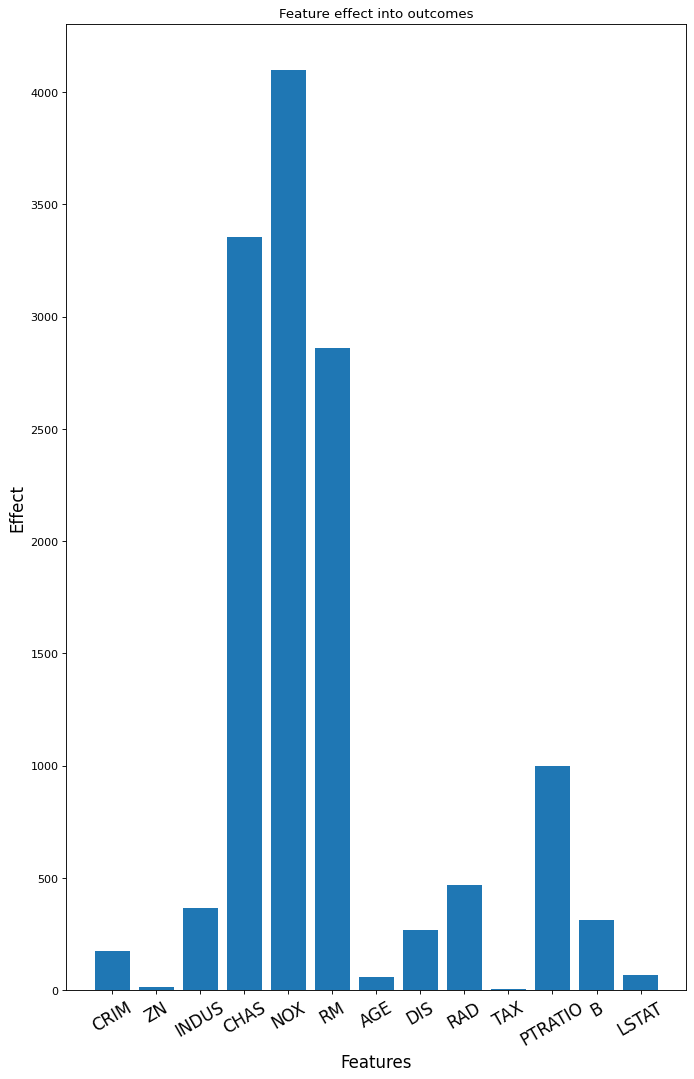

In [14]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 16), dpi=80, facecolor='w', edgecolor='k')

labels = [x[0] for x in avg_effect]
values = [abs(x[1]) for x in avg_effect]
index = np.arange(len(labels))
plt.bar(index, values)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Effect', fontsize=15)
plt.xticks(index, labels, fontsize=15, rotation=30)
plt.title('Feature effect into outcomes')
plt.show()

## Sparse linear final stage

In [26]:
from econml.dml import SparseLinearDMLCateEstimator
from sklearn.linear_model import LassoCV

features = boston.feature_names
avg_effect = []
for i in features:
    print("Considered feature {}".format(i))
    outcome = 'PREDICTED_PRICE'
    remaining_features = list(filter(lambda x: x != i, features))
    Y,T,X = bos[outcome].values, bos[i].values, bos[remaining_features].values
    dml_est = SparseLinearDMLCateEstimator(model_y=LassoCV(), model_t=LassoCV())
    dml_est.fit(Y, T, X, inference='debiasedlasso') # X -> high dimensional features
    treatment_effects = dml_est.effect(X)
    dml_ate = dml_est.effect(X).mean()
    avg_effect.append([i,dml_ate])
    
print("Average treatment effect ", avg_effect)




Considered feature CRIM


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.756312750900179, tolerance: 1.2725388235273
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.039234669163761, tolerance: 1.2725388235273
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.019273178647609, tolerance: 1.244874473009606
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: 

Considered feature ZN


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.055549851314481, tolerance: 1.5774059683371102
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.478250126828243, tolerance: 1.2699270028441982
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171384894.40230313, tolerance: 1318051.179177952
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective

Considered feature INDUS


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.751850241190823, tolerance: 1.570894861644381
  positive)


Considered feature CHAS


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.015578978002168, tolerance: 1.2194622864906786
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.626527367118797, tolerance: 1.2482468775122546
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.115991388593329, tolerance: 1.2482468775122546
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.p

Considered feature NOX


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8812456427176585, tolerance: 1.167034068647136
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.4903290353940974, tolerance: 1.167034068647136
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.447054081550959, tolerance: 1.167034068647136
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py

Considered feature RM


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.523599031267167, tolerance: 1.184593304806073
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.920621651770034, tolerance: 1.184593304806073
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.727803606094767, tolerance: 1.184593304806073
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py

Considered feature AGE


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9734046896714972, tolerance: 1.4068686580096084
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.159876493022239, tolerance: 1.3033744870353807
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.807144725954458, tolerance: 1.3033744870353807
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.

Considered feature DIS


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.2101495699089355, tolerance: 1.2830408548423993
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.225718406214128, tolerance: 1.2830408548423993
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2347084462021485, tolerance: 1.2830408548423993
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent

Considered feature RAD


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2702711412548524, tolerance: 1.3356057366467016
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.861220504305038, tolerance: 1.3356057366467016
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.9828360031197, tolerance: 1.3356057366467016
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py

Considered feature TAX


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15170330.828403592, tolerance: 175657.74176114885
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101119.95067267865, tolerance: 61094.878525489905
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 322430392.53671, tolerance: 26915948.161828175
  positive)


Considered feature PTRATIO


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309802.4604377635, tolerance: 23415.759486853232
  positive)


Considered feature B


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1232249.1400995255, tolerance: 269003.0579530746
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11097.597193345428, tolerance: 10850.964538732489
  positive)


Considered feature LSTAT


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.832286000672866, tolerance: 1.2213993411965236
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0377094684654367, tolerance: 1.2213993411965236
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2621173698216808, tolerance: 1.2213993411965236
  tol, rng, random, positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent

Average treatment effect  [['CRIM', 1.8721944457220578], ['ZN', -0.1938654336132505], ['INDUS', 0.32158950826794025], ['CHAS', 21.058526927657017], ['NOX', -48.02184059527199], ['RM', 4.97987175456403], ['AGE', -0.07734567824999525], ['DIS', -5.880144779542587], ['RAD', 1.6217419863214018], ['TAX', 0.028011828257408448], ['PTRATIO', -1.4715041120232015], ['B', 0.033176969301232886], ['LSTAT', -1.6582264810344456]]


/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.707392226437605, tolerance: 1.581327822468081
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 727797.2100123018, tolerance: 117080.99385783337
  positive)


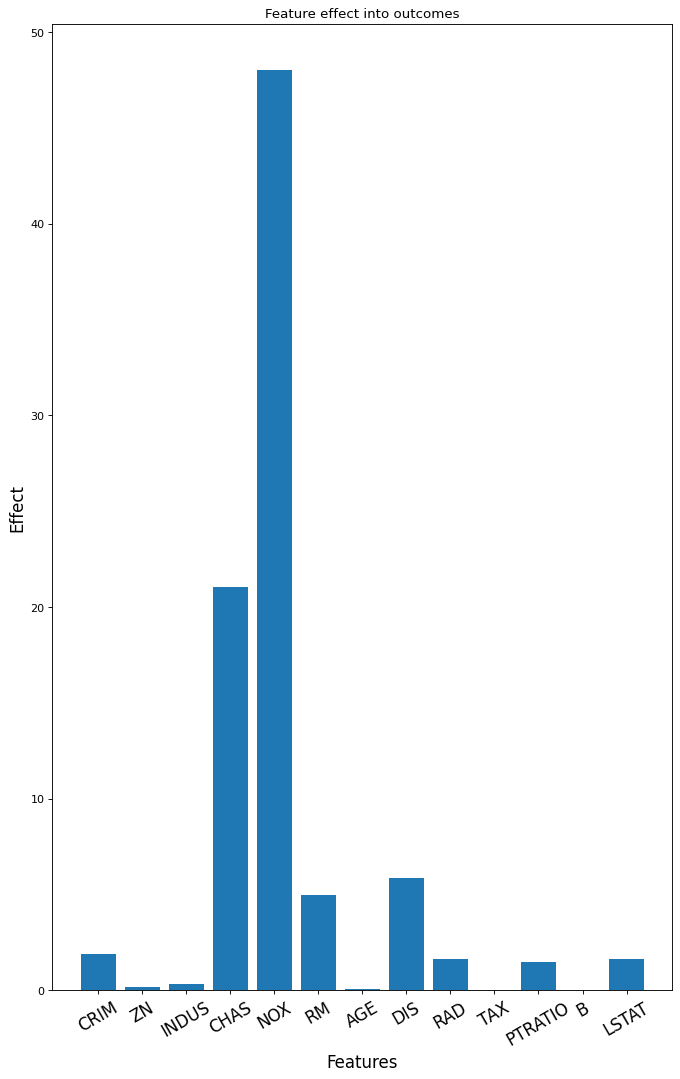

In [27]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 16), dpi=80, facecolor='w', edgecolor='k')

labels = [x[0] for x in avg_effect]
values = [abs(x[1]) for x in avg_effect]
index = np.arange(len(labels))
plt.bar(index, values)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Effect', fontsize=15)
plt.xticks(index, labels, fontsize=15, rotation=30)
plt.title('Feature effect into outcomes')
plt.show()

## Forest DML

In [30]:
from econml.dml import ForestDMLCateEstimator
from econml.ortho_forest import ContinuousTreatmentOrthoForest
from econml.sklearn_extensions.linear_model import WeightedLasso, WeightedLassoCV
features = boston.feature_names
avg_effect = []
for i in features:
    outcome = 'PREDICTED_PRICE'
    remaining_features = list(filter(lambda x: x != i, features))
    
    Y,T,X = bos[outcome].values, bos[i].values, bos[remaining_features].values
    


    est = ContinuousTreatmentOrthoForest(n_trees=50, min_leaf_size=10, 
                                    max_depth=10, subsample_ratio=0.7,
                                    lambda_reg=0.01,
                                    model_T=WeightedLasso(alpha=0.01), model_Y=WeightedLasso(alpha=0.01),
                                    model_T_final=WeightedLassoCV(cv=3), model_Y_final=WeightedLassoCV(cv=3))

    est.fit(Y, T, X, inference = 'bootstrap')

    dml_ate = dml_est.effect(X).mean()
    avg_effect.append([i,dml_ate])
    
print("Average treatment effect ", avg_effect)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    1.8s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBack

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5554591571601151, tolerance: 0.07075731071518364
  positive)
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    9.7s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    9.7s remaining:    3.8s
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6859628193637626, tolerance: 0.0325077346936487
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21809255428098595, tolerance: 0.0635943535469679

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.069134095923555, tolerance: 0.06805084685767238
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70.94052275235948, tolerance: 0.12862765561245224
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9296480193147714, tolerance: 0.16380458626744057
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/l

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.933833485784106, tolerance: 0.11605975536078952
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.256980130940775, tolerance: 0.25724298624975817
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88.89691487678397, tolerance: 0.4201632523710934
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231.54920699201006, tolerance: 0.3131387731361148
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 956.9852884537639, tolerance: 0.6547414066629265
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.9s finished
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1708696067079067, tolerance: 0.04988718925004551
  positive)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.056750758043119, tolerance: 0.057519325091789496
  positive)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: Converge

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11815151565287874, tolerance: 0.0941788130044395
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425.5698776001586, tolerance: 0.3860126286821621
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11359140627678954, tolerance: 0.07249253785968666
  positive)
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    7.0s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    6.9s remain

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.009544814029141, tolerance: 0.2049694871740655
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.38245022330468714, tolerance: 0.06603764389607407
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8073547778458345, tolerance: 0.15475151623374167
  positive)
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    3.6s remaining:    1.4s
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/li

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    8.9s remaining:    3.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    9.2s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.6s finished
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1369.2501160112072, tolerance: 0.8105952199132981
  positive)
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.6s finished
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.827992949148948, tolerance: 0.076089

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5073153922322575, tolerance: 0.04604249739305834
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5218095817088084, tolerance: 0.06788510041918927
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166.30383331034375, tolerance: 0.8357241497312856
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not conv

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    8.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    8.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    8.1s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.25389022426307406, tolerance: 0.14930377032481962
  positive)
/home/dtd/.c

[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    6.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    5.8s remaining:    2.3s
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020906146408676607, tolerance: 0.01929997345787836
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.003711029523497, tolerance: 0.032007284608042856
  positive)
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    6.9s remaining:    2.7s
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the n

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5364440135205681, tolerance: 0.16204499682761042
  positive)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7401193188122193, tolerance: 0.06756362904938963
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.768489971212375, tolerance: 0.12334010535596

[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    7.6s remaining:    3.0s
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.54229631034127, tolerance: 0.6934035866472258
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23675454565413245, tolerance: 0.12729173664139998
  positive)
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    7.7s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    8.6s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    8.2s remaining:    3.2s
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: Co

[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    9.0s remaining:    3.5s
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.96606215114366, tolerance: 0.361003688815253
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.809103554332285, tolerance: 0.1341264090305328
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.1523054750783, tolerance: 0.13811617521277203
  positive)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent 

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.922283620628079, tolerance: 0.07891203528823237
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2565600825390675, tolerance: 0.05126383629394363
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3496653267731631, tolerance: 0.11012758384413239
  positive)
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    5.8s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    7.9s remain

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.14134254367410648, tolerance: 0.07101722676375306
  positive)
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.6s finished
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.020055312099089, tolerance: 0.11120501315596804
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87.47420332043433, tolerance: 0.07302501342343144
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_mode

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1060.6579949918655, tolerance: 0.8571067840836182
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.869442762059965, tolerance: 0.09512792885991089
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8301694917674212, tolerance: 0.04865134992346953
  positive)
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.0s finished
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.65730678543186, tolerance: 0.0892283623928548
  positive)
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    9.5s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.8s finished
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3449204787854381, tolerance: 0.15645114640324106
  positive)
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    9.0s remaining:    3.5s
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1921160792169787, tolerance: 0.08786329312669863
  positive)
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.4s finished
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.360557223157336, tolerance: 0.08563118510033917
  positive)
/home/dtd/.conda/envs/phd_env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.154327775982064, tolerance: 0.1107889434567489
  positive)
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Paralle

ValueError: y contains previously unseen labels: [0]

In [ ]:
avg_effect

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 16), dpi=80, facecolor='w', edgecolor='k')

labels = [x[0] for x in avg_effect]
values = [x[1] for x in avg_effect]
index = np.arange(len(labels))
plt.bar(index, values)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Effect', fontsize=15)
plt.xticks(index, labels, fontsize=15, rotation=30)
plt.title('Feature effect into outcomes')
plt.show()